In [ ]:
##  CSVのファイルのフォーマット変更

import os
import pandas as pd

data_dir = "/root/notebooks/sample/dataset/CSV_only12"

for g in os.listdir(data_dir):
    file_path = os.path.join(data_dir, g)
    #読み込み
    with open(file_path, 'r', encoding='cp1252') as f:
        data = f.read()
    # ファイルをUTF-8でエンコードして保存する
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(data) 
    # CSVファイルをUTF-8で読み込む
    df = pd.read_csv(file_path, encoding='utf-8')
    subset = df.iloc[0:500, 11:23]
    # 新しいCSVファイルとして保存する
    subset.to_csv(file_path, index=False)


In [70]:
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('/root/notebooks/sample/dataset/CSV_4label/Anterior/000076_ID77_20190604_134815_An.csv')

# 各列のデータを配列に格納する
column1_data = df['V6'].tolist()
column2_data = df['a_‡T'].tolist()
# 必要に応じて、他の列も同様に追加してください

column1_data = torch.tensor(column1_data)
column2_data = torch.tensor(column2_data)
# 格納した配列を表示して確認する
print("Column 1:", column1_data.shape)
print("Column 2:", column2_data.shape)
seq = torch.stack([column1_data, column2_data])
print(seq.shape)
# 他の列も同様に表示する

column77 = df.columns
print(column77)
# 必要に応じて、配列を後の処理に使用します


Column 1: torch.Size([500])
Column 2: torch.Size([500])
torch.Size([2, 500])
Index(['V6', 'a_‡T', 'a_‡U', 'a_‡V', 'a_aVR', 'a_aVL', 'a_aVF', 'a_V1', 'a_V2',
       'a_V3', 'a_V4', 'a_V5'],
      dtype='object')


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import glob
import torch
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as tf
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
import yaml

from torch.utils.data import TensorDataset, DataLoader, Subset 
from sklearn.model_selection import train_test_split
from PIL import Image
from PIL import ImageOps

import numpy as np
import random
import matplotlib.pyplot as plt
import os
import glob
import torch
import torchvision
from torchvision import transforms
import torchvision.transforms.functional as tf
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
import yaml

from torch.utils.data import TensorDataset, DataLoader, Subset 
from sklearn.model_selection import train_test_split
from PIL import Image
from PIL import ImageOps
import pandas as pd

from dataloader_csv import create_dataloader_csv

device = torch.device("cpu")

print(device)
path = os.getcwd()
path = '/root/notebooks/sample/dataset/CSV_4label'
train_dataloader,test_dataloader,labels=create_dataloader_csv(path,1,None)

/python/build/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cpu
Classification label : {'Lateral': 0, 'Posterior': 1, 'Anterior': 2, 'Inferior': 3}
torch.Size([149, 12, 500])
149
test1
dataset len : 149
labels len : 149
tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3])
test2
indices
119
30


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
tens = torch.randn(149, 12, 500)
print(tens.size(0), tens.size(1))

149 12


In [13]:
# LSTMモデルの定義
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    

# ハイパーパラメータの設定
input_size = tens.shape[1]  # 特徴量の数
hidden_size = 64
num_layers = 2
num_classes = 4

# モデル、損失関数、オプティマイザの定義
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
model.to(device)

outputs_test = model(tens)

RuntimeError: input.size(-1) must be equal to input_size. Expected 12, got 500

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# データの準備
# X_train, y_train, X_test, y_test = load_data_from_csv(...)
# 前処理など

# データをPyTorchのテンソルに変換
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# LSTMモデルの定義
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# ハイパーパラメータの設定
input_size = X_train_tensor.shape[2]  # 特徴量の数
hidden_size = 64
num_layers = 2
num_classes = len(np.unique(y_train))

# モデル、損失関数、オプティマイザの定義
model = LSTMClassifier(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# モデルのトレーニング
model.to(device)
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# モデルの評価
with torch.no_grad():
    X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'Accuracy: {accuracy.item():.2f}')

In [15]:
!which python3
!/usr/local/bin/python3 -m pip install networkx


/usr/local/bin/python3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3.10 install --upgrade pip


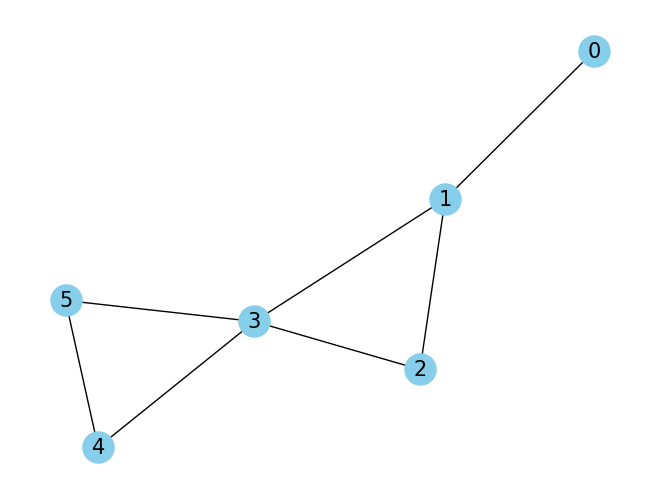

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def visibility_graph(time_series):
    n = len(time_series)
    G = nx.Graph()

    # ノードの追加
    G.add_nodes_from(range(n))
    
    # エッジの追加
    for i in range(n):
        for j in range(i + 1, n):
            visible = True
            for k in range(i + 1, j):
                if time_series[k] >= time_series[i] + (time_series[j] - time_series[i]) * (k - i) / (j - i):
                    visible = False
                    break
            if visible:
                G.add_edge(i, j)
    
    return G

# サンプル時系列データ
time_series = np.array([1, 3, 2, 5, 4, 6])

# 可視化グラフの生成
G = visibility_graph(time_series)

# グラフの描画
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=15, font_color="black")
plt.show()

In [15]:
test = torch.randn(3,5)

tensor([[ 0.6487,  0.7988, -0.9412, -1.4863, -1.1304],
        [ 0.8474,  0.9011, -2.4611, -0.4239, -0.9453],
        [-0.9840, -2.3184, -0.7797, -0.9295,  1.9421]])


In [4]:
a, b = map(int, input().split())

if (a * b) % 2 == 0:
    print("even")
else:
    print("odd")


odd
